# Name: Jose Dominguez Alonso
# Assignment Name: CA05-Logistic Regression

# 1. Data Source and Contents

In [28]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

In [5]:
#Read data using URL
url = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [6]:
#Check the data
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [7]:
#Check the total number of columns and rows of dataset
data.shape

(3242, 17)

In [8]:
#Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [9]:
#Count of values per column
data.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [10]:
#Number of null values per column
data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [36]:
#Descriptive statistics
data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


# 2. Spliting train and test data

In [12]:
#Isolating the label and feature data 
y = data['cvd_4types']
X = data.iloc[ : , 1: ]

#Splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

# 3. Creating a Logistic Regression Model

In [15]:
#Fit and train the model
clf = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')
fitted_model = clf.fit(X_train, y_train)

#Predict
y_pred = clf.predict(X_test)

In [17]:
#Performance metrics
#Accuracy
accuracy = fitted_model.score(X_test, y_test)
#AUC
auc = roc_auc_score(y_test, y_pred)
#F1
F1 = f1_score(y_test, y_pred)

print('Accuracy score:', accuracy)
print('Auc score:', auc)
print('F1 Score:', F1)

Accuracy score: 0.6855087358684481
Auc score: 0.6612240706510577
F1 Score: 0.7563694267515925


# 4. Feature Importance

In [19]:
#Creating standardized coefficents
stan_coef = np.std(X_train, 0) * clf.coef_[0]

#Sorting values by feature importance
print(stan_coef.sort_values(ascending = False))

waist           1.199641
educat          0.198607
parrptdiab      0.162473
srhype          0.111300
tired25         0.103156
bend25          0.082020
age_s1          0.013744
cgpkyr         -0.010167
tea15          -0.072458
happy25        -0.089481
mstat          -0.154910
av_weight_kg   -0.222158
neck20         -0.234039
race           -0.344912
hlthlm25       -0.366042
hip            -0.649433
dtype: float64


# 5. Model Performance

In [22]:
#Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.44      0.56       432
           1       0.66      0.88      0.76       541

    accuracy                           0.69       973
   macro avg       0.70      0.66      0.66       973
weighted avg       0.70      0.69      0.67       973



In [35]:
#AUC & F1 scores
auc_score = roc_auc_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print('auc_score:', auc_score)
print('F1_Score:', F1)

auc_score: 0.6612240706510577
F1_Score: 0.7563694267515925


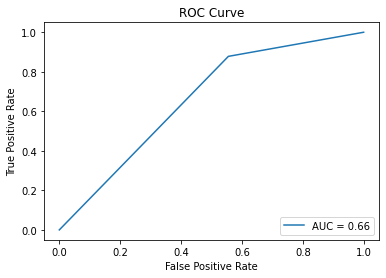

In [34]:
#Setting up ROC graph
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)

#Showing ROC graph
roc_plot = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)
roc_plot.plot()
plt.title("ROC Curve")
plt.show()